# **Kruskal-Wallis Test**

The Kruskal-Wallis test is a non-parametric statistical test used to determine if there are significant differences between two or more independent groups. It is an extension of the Mann-Whitney U test to more than two groups and is used when the assumptions of one-way ANOVA (such as normality) are not met.

**Why to use it ?**
- The Kruskal-Wallis test is used when the data does not meet the assumptions of normality and homogeneity of variances required by ANOVA.

- It compares the ranks of the values across multiple groups rather than the means

- it useful for ordinal data or continuous data that isn't normally distributed.

**When to use it ?**

- When we have more than two independent groups.

- When the dependent variable is ordinal or continuous but not normally distributed.

- When we cannot assume homogeneity of variances.

## Dataset

### Generating Dataset

In [8]:
import numpy as np
import pandas as pd


np.random.seed(42)

course_A_scores = np.random.normal(loc=75, scale=10, size=30)  
course_B_scores = np.random.normal(loc=70, scale=12, size=30)  
course_C_scores = np.random.normal(loc=80, scale=9, size=30)   

data = pd.DataFrame({
    'Course': ['Course A'] * 30 + ['Course B'] * 30 + ['Course C'] * 30,
    'Score': np.concatenate([course_A_scores, course_B_scores, course_C_scores])
})

data.to_csv('C:/Github Repository/Advanced-Statistical-Methods-for-AB-and-Hypothesis-Testing-Methods-of-Experimentations/datasets/Kruskal-Wallis Test/group_scores.csv', index=False)

### Loading Dataset

In [9]:
import pandas as pd

data = pd.read_csv('C:/Github Repository/Advanced-Statistical-Methods-for-AB-and-Hypothesis-Testing-Methods-of-Experimentations/datasets/Kruskal-Wallis Test/group_scores.csv')

In [10]:
data.head()

,Course,Score
0,Course A,79.967142
1,Course A,73.617357
2,Course A,81.476885
3,Course A,90.230299
4,Course A,72.658466


### Data Summary

**Number of Entries:** 90 (30 students in each of 3 courses)

**Features:**

**Course:** Categorical variable with three levels: "Course A", "Course B", "Course C".

**Score:** Continuous variable representing student scores with normally distributed values for each course.

### Data Visualization

#### Comparing Score Distributions

C:\Users\NIHAL\AppData\Local\Temp\ipykernel_15792\664726359.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Course', y='Score', data=data, palette='Set2')


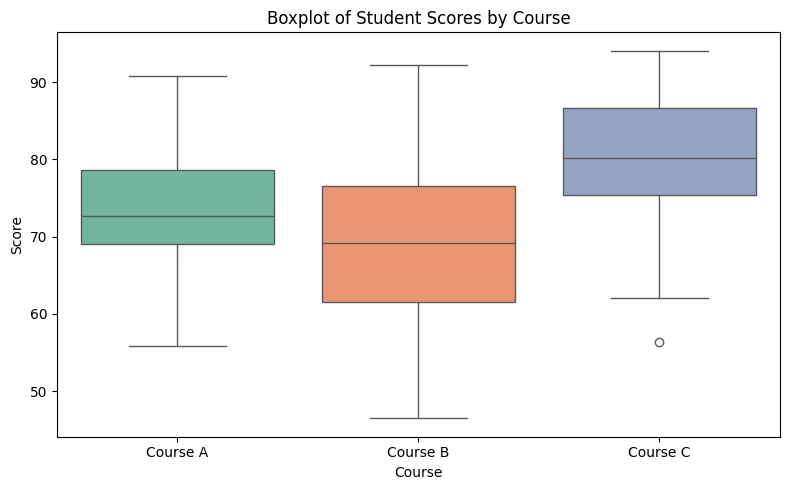

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='Course', y='Score', data=data, palette='Set2')
plt.title("Boxplot of Student Scores by Course")
plt.xlabel("Course")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

### Distributions + KDE

C:\Users\NIHAL\AppData\Local\Temp\ipykernel_15792\560543745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Course', y='Score', data=data, inner='box', palette='Pastel1')


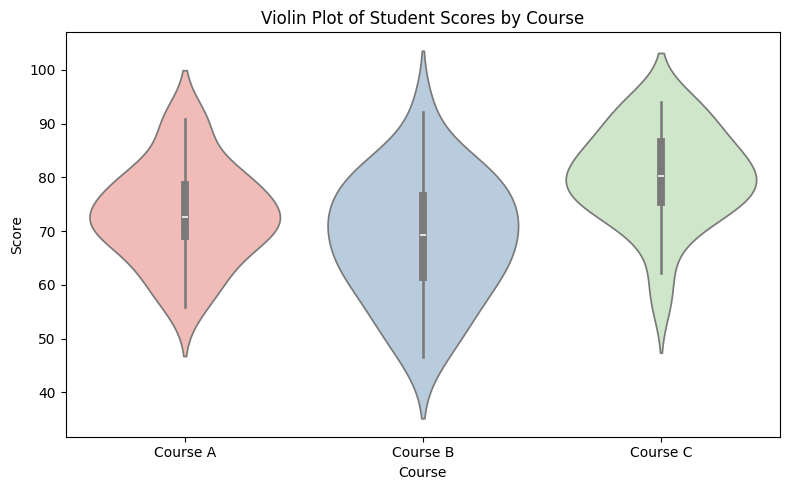

In [12]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Course', y='Score', data=data, inner='box', palette='Pastel1')
plt.title("Violin Plot of Student Scores by Course")
plt.xlabel("Course")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

#### Overlayed Distributions

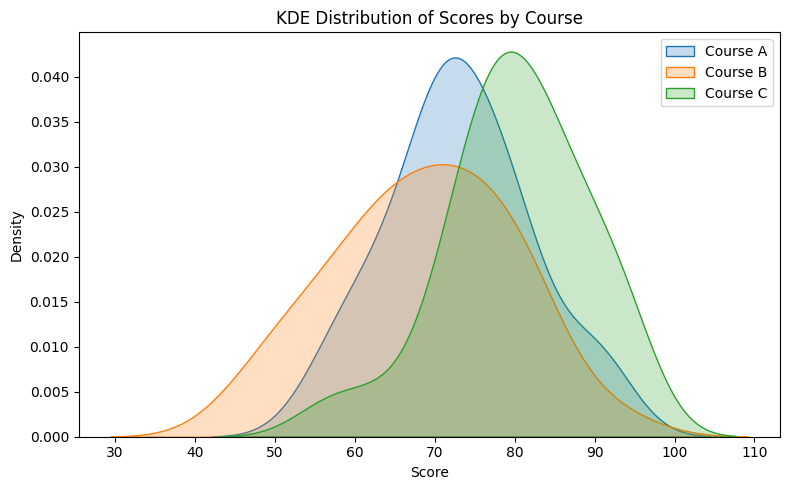

In [13]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data[data['Course'] == 'Course A']['Score'], label='Course A', fill=True)
sns.kdeplot(data=data[data['Course'] == 'Course B']['Score'], label='Course B', fill=True)
sns.kdeplot(data=data[data['Course'] == 'Course C']['Score'], label='Course C', fill=True)
plt.title("KDE Distribution of Scores by Course")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

## Kruskal-Wallis Test

In [14]:
from scipy.stats import kruskal

course_A_scores = data[data['Course'] == 'Course A']['Score']
course_B_scores = data[data['Course'] == 'Course B']['Score']
course_C_scores = data[data['Course'] == 'Course C']['Score']

stat, p_value = kruskal(course_A_scores, course_B_scores, course_C_scores)

print(f"Kruskal-Wallis H-statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Kruskal-Wallis H-statistic: 18.023150183150165
P-value: 0.0001219895598887542
Reject the null hypothesis: There is a significant difference between the groups.


**Interpetation :**

- Kruskal-Wallis H-statistic: 18.02
- P-value: 0.00012

Since the p-value (0.00012) is less than the commonly used significance level of 0.05, we reject the null hypothesis.
